In [1]:
import geopandas 
import requests
gdf = geopandas.read_file('CA_ML_Image_Footprints.zip')

In [2]:
gdf.head()

,STATE,BREAK_NAME,RISK_VALUE,AOI_Name,AI_ID,Id,Shape_Leng,Shape_Area,geometry
0,California,Wildland,9,San Jose,1,3,0.016372,0.000016,"POLYGON ((-122.12601 37.08334, -122.13067 37.0..."
1,California,Wildland,9,San Jose,2,3,0.016378,0.000016,"POLYGON ((-122.10738 37.15394, -122.11204 37.1..."
2,California,Wildland,9,San Jose,3,3,0.016380,0.000016,"POLYGON ((-122.11670 37.16100, -122.12136 37.1..."
3,California,Wildland,9,San Jose,4,3,0.016376,0.000016,"POLYGON ((-122.13067 37.11863, -122.13533 37.1..."
4,California,Wildland,9,San Jose,5,3,0.016374,0.000016,"POLYGON ((-122.15862 37.09393, -122.16328 37.0..."


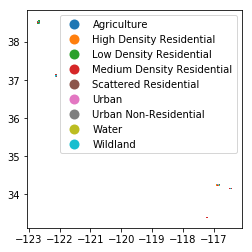

In [3]:
gdf.plot("BREAK_NAME", legend=True)

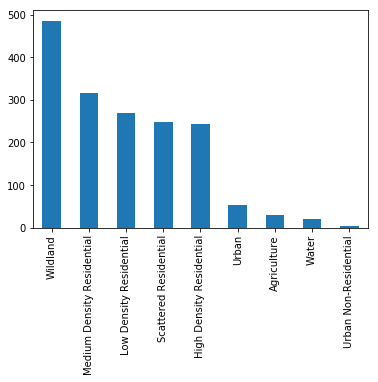

In [4]:
#gdf["BREAK_NAME"].describe()
f = gdf["BREAK_NAME"].value_counts()
ax = f.plot.bar()

In [5]:
gdf.head()

,STATE,BREAK_NAME,RISK_VALUE,AOI_Name,AI_ID,Id,Shape_Leng,Shape_Area,geometry
0,California,Wildland,9,San Jose,1,3,0.016372,0.000016,"POLYGON ((-122.12601 37.08334, -122.13067 37.0..."
1,California,Wildland,9,San Jose,2,3,0.016378,0.000016,"POLYGON ((-122.10738 37.15394, -122.11204 37.1..."
2,California,Wildland,9,San Jose,3,3,0.016380,0.000016,"POLYGON ((-122.11670 37.16100, -122.12136 37.1..."
3,California,Wildland,9,San Jose,4,3,0.016376,0.000016,"POLYGON ((-122.13067 37.11863, -122.13533 37.1..."
4,California,Wildland,9,San Jose,5,3,0.016374,0.000016,"POLYGON ((-122.15862 37.09393, -122.16328 37.0..."


In [6]:
gdf['bounds'] = gdf['geometry'].apply(lambda x: x.bounds)

In [7]:
gdf.head()

,STATE,BREAK_NAME,RISK_VALUE,AOI_Name,AI_ID,Id,Shape_Leng,Shape_Area,geometry,bounds
0,California,Wildland,9,San Jose,1,3,0.016372,0.000016,"POLYGON ((-122.12601 37.08334, -122.13067 37.0...","(-122.13067199999995, 37.08334300000007, -122...."
1,California,Wildland,9,San Jose,2,3,0.016378,0.000016,"POLYGON ((-122.10738 37.15394, -122.11204 37.1...","(-122.11203999999998, 37.15393500000005, -122...."
2,California,Wildland,9,San Jose,3,3,0.016380,0.000016,"POLYGON ((-122.11670 37.16100, -122.12136 37.1...","(-122.12135599999999, 37.160997000000066, -122..."
3,California,Wildland,9,San Jose,4,3,0.016376,0.000016,"POLYGON ((-122.13067 37.11863, -122.13533 37.1...","(-122.13532999999995, 37.11863100000005, -122...."
4,California,Wildland,9,San Jose,5,3,0.016374,0.000016,"POLYGON ((-122.15862 37.09393, -122.16328 37.0...","(-122.16327799999999, 37.093927000000065, -122..."


In [8]:
import os
def get_save_url(x):
    url = """https://gis.apfo.usda.gov/arcgis/services/NAIP/USDA_CONUS_PRIME/ImageServer/WMSServer?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={}&CRS=EPSG:4326&WIDTH=256&HEIGHT=256&LAYERS=0&STYLES=&FORMAT=image/jpeg&DPI=96&MAP_RESOLUTION=96&FORMAT_OPTIONS=dpi:96&TRANSPARENT=TRUE"""
    return url.format(','.join([str(val) for val in [x[1],x[0],x[3],x[2]]]))


                      
save_dir = '/mnt/data/break_names'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for break_name in gdf['BREAK_NAME'].str.lower().str.replace(' ','_').str.replace('-','_').unique():
    print(break_name)
    if not os.path.exists(os.path.join(save_dir,break_name)):
        os.makedirs(os.path.join(save_dir,break_name))
        

        

wildland
agriculture
low_density_residential
high_density_residential
scattered_residential
medium_density_residential
water
urban
urban_non_residential


In [9]:
gdf['file_save'] = gdf.apply(lambda row: os.path.join(save_dir,row['BREAK_NAME'].lower().replace(' ','_').replace('-','_'),str(row['AI_ID'])+'.jpg'),axis=1)

In [10]:
gdf['url'] = gdf['bounds'].apply(get_save_url)

In [11]:
def save_data(url,path):
    res = requests.get(url)
    with open(path,'wb') as f:
        f.write(res.content)
    return res.status_code


url_list = gdf['url'].tolist()
save_list = gdf['file_save'].tolist()



In [13]:
from joblib import Parallel,delayed



status_codes = Parallel(n_jobs=10,backend='threading')(delayed(save_data)(url=url,path=path) for url,path in zip(url_list,save_list))

SSLError: HTTPSConnectionPool(host='gis.apfo.usda.gov', port=443): Max retries exceeded with url: /arcgis/services/NAIP/USDA_CONUS_PRIME/ImageServer/WMSServer?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX=37.08334300000007,-122.13067199999995,37.08687100000003,-122.12601399999994&CRS=EPSG:4326&WIDTH=256&HEIGHT=256&LAYERS=0&STYLES=&FORMAT=image/jpeg&DPI=96&MAP_RESOLUTION=96&FORMAT_OPTIONS=dpi:96&TRANSPARENT=TRUE (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))

In [ ]:
gdf['BREAK_NAME'].value_counts()

In [14]:
gdf.groupby('BREAK_NAME')['RISK_VALUE'].mean()

BREAK_NAME
Agriculture                   1
High Density Residential      2
Low Density Residential       4
Medium Density Residential    3
Scattered Residential         5
Urban                         6
Urban Non-Residential         7
Water                         8
Wildland                      9
Name: RISK_VALUE, dtype: int64

In [15]:
gdf['status_codes'] = status_codes

NameError: name 'status_codes' is not defined

In [16]:
gdf[['BREAK_NAME','RISK_VALUE','file_save','url']].to_csv('CA_break_training_data.csv',sep='|')

In [17]:
from skimage.io import *
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 15)
group_data = gdf.groupby('BREAK_NAME').sample(5)

pic_list = group_data['file_save'].tolist()

chunks = [pic_list[i:i+9] for i in range(0,len(pic_list),9)]

for chunk in chunks:
    try:
        fig = imshow_collection([imread(pic) for pic in chunk])
    except OSError:
        print("No Images found")
        continue
    for i,ax in enumerate(fig.axes):
        ax.set_xticks([])
        ax.set_yticks([])
        try:
            records = group_data[group_data['file_save']==chunk[i]].to_dict('records')[0]
            pred = records['BREAK_NAME']
            ax.set_title(pred,color='dodgerblue')
        except IndexError as e:
            pass

ValueError: Cannot take a larger sample than population when 'replace=False'